In [ ]:
import torch
import torch.nn as nn
import torch.functional as F
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import random
from sklearn.utils import shuffle
import ntpath
import imgaug.augmenters as iaa
from matplotlib.image import imread
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


In [ ]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

# loading the data

In [ ]:
# downloading the data

!git clone https://github.com/rslim087a/track

Cloning into 'track'...
remote: Enumerating objects: 12163, done.
remote: Total 12163 (delta 0), reused 0 (delta 0), pack-reused 12163 (from 1)
Receiving objects: 100% (12163/12163), 156.98 MiB | 29.89 MiB/s, done.
Updating files: 100% (12160/12160), done.


In [ ]:
datadir = "track"
columns = ["center", "left", "right", "steering", "throttle", "reverse", "speed"]
data = pd.read_csv(os.path.join(datadir,"driving_log.csv"), names = columns)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.615438


In [ ]:
pd.set_option("display.max_colwidth", 1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [ ]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail



In [ ]:
data["center"] = data["center"].apply(path_leaf)
data["left"] = data["left"].apply(path_leaf)
data["right"] = data["right"].apply(path_leaf)

data

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438
...,...,...,...,...,...,...,...
4048,center_2018_07_16_17_16_31_474.jpg,left_2018_07_16_17_16_31_474.jpg,right_2018_07_16_17_16_31_474.jpg,0.0,0.0,0.0,26.017680
4049,center_2018_07_16_17_16_31_544.jpg,left_2018_07_16_17_16_31_544.jpg,right_2018_07_16_17_16_31_544.jpg,0.0,0.0,0.0,25.808640
4050,center_2018_07_16_17_16_31_617.jpg,left_2018_07_16_17_16_31_617.jpg,right_2018_07_16_17_16_31_617.jpg,0.0,0.0,0.0,25.652960
4051,center_2018_07_16_17_16_31_685.jpg,left_2018_07_16_17_16_31_685.jpg,right_2018_07_16_17_16_31_685.jpg,0.0,0.0,0.0,25.446850


In [ ]:
def plot(data, position):
    random_numbers = [random.randint(0, 4052) for _ in range(5)]

    plt.figure(figsize = (15,10))
    Image_folder = "track/IMG"
    for i in random_numbers:
        img_path = os.path.join(Image_folder, data[position][i])
        img = cv2.imread(img_path)

        if img is not None:
            cv2.imshow(f"sterring: {data['steering'][i]}, speed {data['speed'][i]} ", img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print(f" Cannot load the image")

In [ ]:
#plot(data, "center")

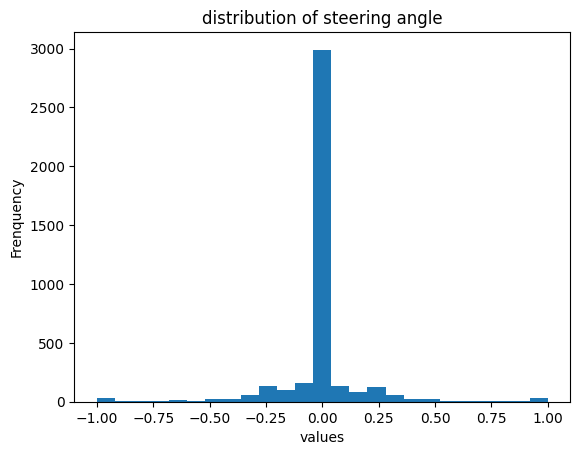

In [ ]:
plt.hist(data["steering"], bins = 25)
plt.title("distribution of steering angle")
plt.xlabel("values")
plt.ylabel("Frenquency")
plt.show()

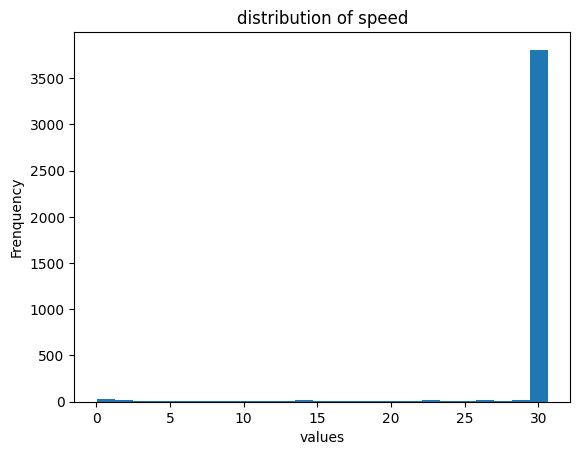

In [ ]:
plt.hist(data["speed"], bins = 25)
plt.title("distribution of speed")
plt.xlabel("values")
plt.ylabel("Frenquency")
plt.show()

In [ ]:
mask = data[data["steering"] == 0]

sampled_data = mask.sample(n=400, random_state = 1)
sampled_data

,center,left,right,steering,throttle,reverse,speed
1583,center_2018_07_16_17_13_37_106.jpg,left_2018_07_16_17_13_37_106.jpg,right_2018_07_16_17_13_37_106.jpg,0.0,0.0,0.0,22.84739
296,center_2018_07_16_17_12_05_084.jpg,left_2018_07_16_17_12_05_084.jpg,right_2018_07_16_17_12_05_084.jpg,0.0,1.0,0.0,30.19031
3108,center_2018_07_16_17_15_25_216.jpg,left_2018_07_16_17_15_25_216.jpg,right_2018_07_16_17_15_25_216.jpg,0.0,1.0,0.0,30.19028
104,center_2018_07_16_17_11_51_402.jpg,left_2018_07_16_17_11_51_402.jpg,right_2018_07_16_17_11_51_402.jpg,0.0,1.0,0.0,30.18862
3492,center_2018_07_16_17_15_52_259.jpg,left_2018_07_16_17_15_52_259.jpg,right_2018_07_16_17_15_52_259.jpg,0.0,1.0,0.0,30.18954
...,...,...,...,...,...,...,...
975,center_2018_07_16_17_12_53_908.jpg,left_2018_07_16_17_12_53_908.jpg,right_2018_07_16_17_12_53_908.jpg,0.0,1.0,0.0,30.18954
282,center_2018_07_16_17_12_04_104.jpg,left_2018_07_16_17_12_04_104.jpg,right_2018_07_16_17_12_04_104.jpg,0.0,1.0,0.0,30.19030
1991,center_2018_07_16_17_14_06_160.jpg,left_2018_07_16_17_14_06_160.jpg,right_2018_07_16_17_14_06_160.jpg,0.0,1.0,0.0,30.18997
3498,center_2018_07_16_17_15_52_677.jpg,left_2018_07_16_17_15_52_677.jpg,right_2018_07_16_17_15_52_677.jpg,0.0,1.0,0.0,30.19028


In [ ]:
final_data = pd.concat([sampled_data, data[data["steering"] != 0]]).reset_index(drop=True)
final_data

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_13_37_106.jpg,left_2018_07_16_17_13_37_106.jpg,right_2018_07_16_17_13_37_106.jpg,0.000000,0.000000,0.0,22.84739
1,center_2018_07_16_17_12_05_084.jpg,left_2018_07_16_17_12_05_084.jpg,right_2018_07_16_17_12_05_084.jpg,0.000000,1.000000,0.0,30.19031
2,center_2018_07_16_17_15_25_216.jpg,left_2018_07_16_17_15_25_216.jpg,right_2018_07_16_17_15_25_216.jpg,0.000000,1.000000,0.0,30.19028
3,center_2018_07_16_17_11_51_402.jpg,left_2018_07_16_17_11_51_402.jpg,right_2018_07_16_17_11_51_402.jpg,0.000000,1.000000,0.0,30.18862
4,center_2018_07_16_17_15_52_259.jpg,left_2018_07_16_17_15_52_259.jpg,right_2018_07_16_17_15_52_259.jpg,0.000000,1.000000,0.0,30.18954
...,...,...,...,...,...,...,...
1521,center_2018_07_16_17_16_29_116.jpg,left_2018_07_16_17_16_29_116.jpg,right_2018_07_16_17_16_29_116.jpg,-0.277988,1.000000,0.0,30.16933
1522,center_2018_07_16_17_16_29_186.jpg,left_2018_07_16_17_16_29_186.jpg,right_2018_07_16_17_16_29_186.jpg,-0.047584,1.000000,0.0,30.19039
1523,center_2018_07_16_17_16_29_691.jpg,left_2018_07_16_17_16_29_691.jpg,right_2018_07_16_17_16_29_691.jpg,0.150000,1.000000,0.0,30.18400
1524,center_2018_07_16_17_16_29_761.jpg,left_2018_07_16_17_16_29_761.jpg,right_2018_07_16_17_16_29_761.jpg,0.300000,1.000000,0.0,30.16918


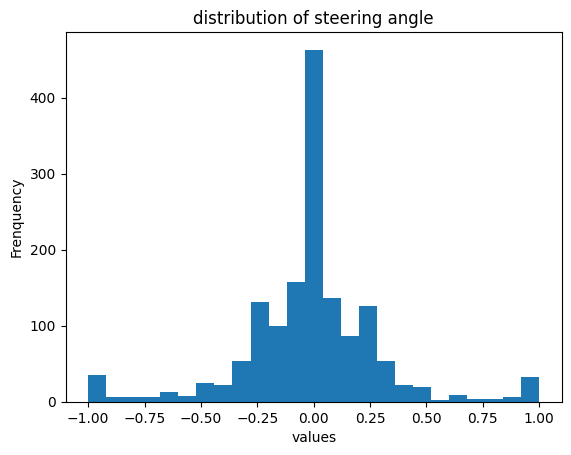

In [ ]:
plt.hist(final_data["steering"], bins =25)
plt.title("distribution of steering angle")
plt.xlabel("values")
plt.ylabel("Frenquency")
plt.show()

# Data augmentation

In [ ]:
def flip_horizontale(image, steering_angle):
    #img = cv2.imread(image_path)

    img_flip = cv2.flip(image, 1)
    #img_flip = cv2.cvtColor(img_flip, cv2.COLOR_BGR2RGB)  # Conversion en RGB

    return img_flip, -steering_angle


def zoom(image):
    #image = cv2.imread(image_path)

    zoom = iaa.Affine(scale = (1,1.3))
    image_zoom = zoom.augment_image(image)

    return image_zoom

def pan(image):
    #image = cv2.imread(image)

    pan = iaa.Affine(translate_percent = {"x": (-0.1,0.1), "y": (-0.1,0.1)})
    image_pan = pan.augment_image(image)

    return image_pan

def brightness(image):
    #image = cv2.imread(image_path)

    brightness = iaa.Multiply((0.5,1.3))
    image_bri = brightness.augment_image(image)
    #image_bri = cv2.cvtColor(image_bri, cv2.COLOR_BGR2RGB)  # Conversion en RGB

    return image_bri

In [ ]:
def augment(image_path, steering_angle):
    image = imread(image_path)


    if random.uniform(0,1) > 0.5:
        image = brightness(image)

    if random.uniform(0,1) > 0.5:
        image = pan(image)

    if random.uniform(0,1) > 0.5:
        image = zoom(image)

    if random.uniform(0,1) > 0.5:
        image, steering_angle = flip_horizontale(image, steering_angle)

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Conversion en RGB


    return image, steering_angle

In [ ]:
def plot_original_augment(data):
    random_numbers = [random.randint(0,1000) for _ in range(2)]

    Image_folder = "track/IMG"

    plt.figure(figsize = (15,10))

    for idx, i in enumerate(random_numbers):
        img_path = os.path.join(Image_folder, data["center"][i])

        original_image = imread(img_path)

        steering_angle = data["steering"][i]
        augmented_image, _ = augment(img_path, 0)

        # plot original Image
        plt.subplot(5, 2, idx * 2 + 1)
        plt.imshow(original_image)
        plt.title("Original Image")
        plt.axis('off')

        # plot  augmented Image
        plt.subplot(5, 2, idx * 2 + 2)
        plt.imshow(augmented_image)
        plt.title(" Augmented Image")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


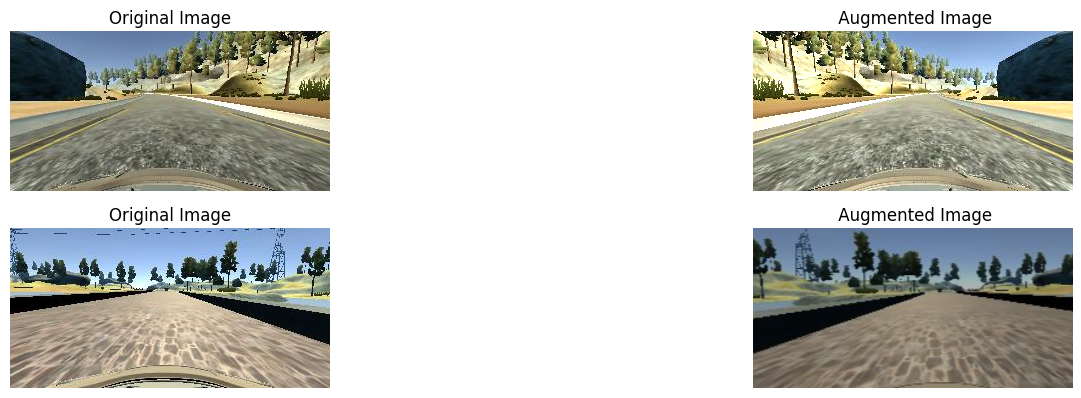

In [ ]:
plot_original_augment(data)

In [ ]:
def Load_img(directory, data):
    image_path = []
    steering= []

    Image_folder =  directory + "/IMG"


    for i in range(len(data)):

      image_path.append(os.path.join(Image_folder, data["center"][i]))
      steering.append(data["steering"][i])

      image_path.append(os.path.join(Image_folder, data["left"][i]))
      steering.append(data["steering"][i] + 0.15)

      image_path.append(os.path.join(Image_folder, data["right"][i]))
      steering.append(data["steering"][i] - 0.15)


    return image_path, steering


In [ ]:
image_paths, steering = Load_img("track", final_data)



In [ ]:
print(len(image_paths),len(steering))

4578 4578


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_paths, steering, test_size=0.2, random_state= 42)

In [ ]:
print(f" X_train size: {len(X_train)}, X_test shape: {len(X_test)}")

 X_train size: 3662, X_test shape: 916


In [ ]:
cpt = 0
for i in y_train:
    if i == 0:
        cpt += 1
print(cpt)

434


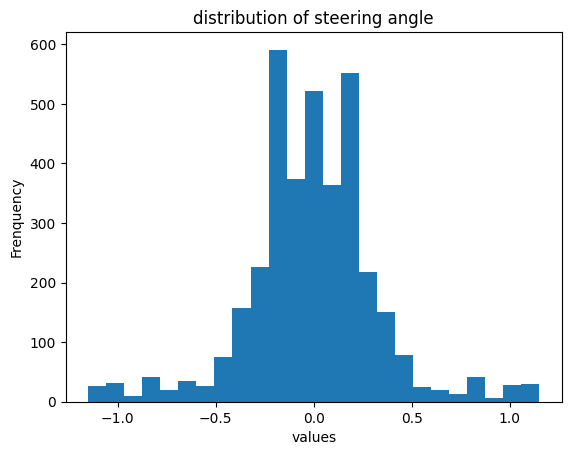

In [ ]:
a = [row for row in y_train]
plt.hist(a, bins =25)
plt.title("distribution of steering angle")
plt.xlabel("values")
plt.ylabel("Frenquency")
plt.show()

# Image preprocess

In [ ]:
def img_preprocess(img):
    img = img[60:135, :, :]

    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    img = cv2.GaussianBlur(img, (3,3), 0)

    img = cv2.resize(img, (200,66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocess Image')

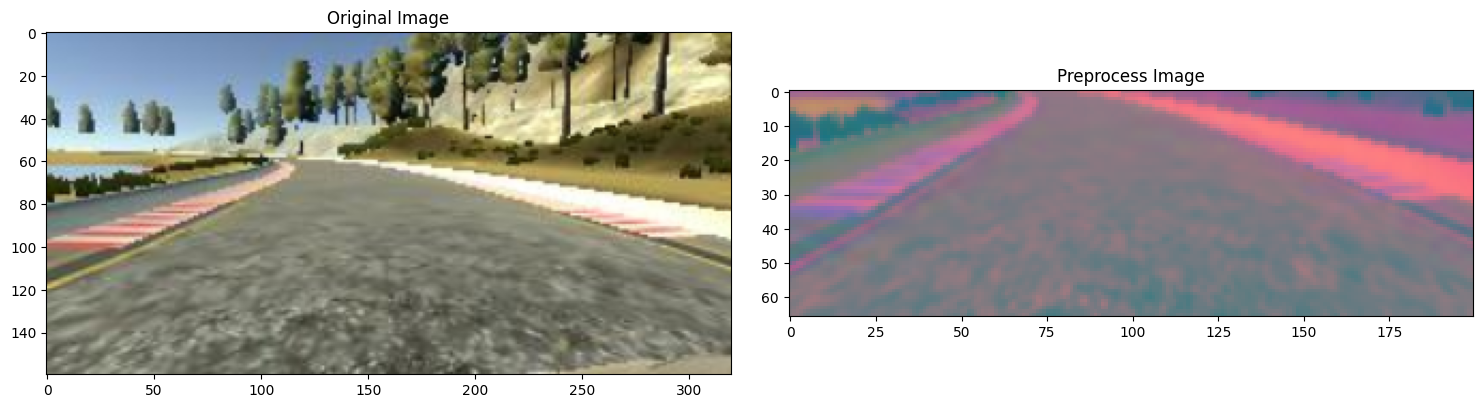

In [ ]:
random_numb = random.randint(0, len(image_paths)-1)

#img_original = imread(image_paths[random_numb])

img_original,_ = augment(image_paths[random_numb], 0)

img = img_preprocess(img_original)

fig, axs = plt.subplots(1, 2, figsize = (15,10))
fig.tight_layout()

axs[0].imshow(img_original)
axs[0].set_title("Original Image")

axs[1].imshow(img)
axs[1].set_title("Preprocess Image")


In [ ]:
def to_tensor2(my_list):
    transform_list = torch.tensor(my_list)

    transform_list = transform_list.permute(2, 0, 1)

    transform_list = transform_list.to(torch.float32)

    transform_list = transform_list.to(device)

    return transform_list

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, image_paths, steering, is_training, transform):
        """
        Args:
            image_paths (list): List of image file paths.
            steering_speed (list): List of (steering_angle, speed) tuples.
            is_training (bool): Whether to apply data augmentation.
            transform (callable, optional): Optional transform to be applied on an image.
        """
        self.image_paths = image_paths
        self.steering= steering
        self.is_training = is_training
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        steering = self.steering[idx]

        # Load the image
        image = imread(image_path)

        # Apply data augmentation during training
        if self.is_training:
            image, steering = augment(image_path, steering)

        image = img_preprocess(image)

        # Apply the transform if provided
        if self.transform:
            image = self.transform(image)

        steering_tensor = torch.tensor(steering, dtype=torch.float32)

        return image, steering_tensor

In [ ]:
train_dataset = CustomDataset(image_paths=X_train, steering=y_train, is_training=True, transform=to_tensor2)
test_dataset = CustomDataset(image_paths=X_test, steering=y_test, is_training=False, transform=to_tensor2)

229
torch.Size([16, 3, 66, 200]) torch.Size([16])
tensor([ 0.0074, -0.2002,  0.1500, -0.8000, -0.4226, -0.5835,  0.1000, -0.4923,
         0.0684, -0.1500,  0.0000,  0.6000, -0.0020,  0.0100,  0.0000, -0.1000])


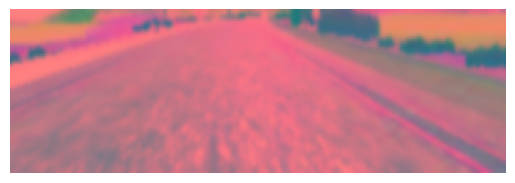

In [ ]:


# Create the DataLoader
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
print(len(train_dataloader))

for batch, (X, y_steering) in enumerate(train_dataloader):
    print(X.shape, y_steering.shape)
    print(y_steering)
    if batch == 0:
        # Choose the first image from the batch
        image = X[0]  # Assuming X has shape (batch_size, channels, height, width)

        # Convert the image tensor to numpy array and rearrange the channels for plotting (CHW to HWC)
        image = image.permute(1, 2, 0).cpu().numpy()

        # If the image was normalized, unnormalize it (optional, depending on your transform)
        # For example, if you normalized with mean and std:
        # mean = [0.485, 0.456, 0.406]
        # std = [0.229, 0.224, 0.225]
        # image = image * std + mean

        # Plot the image
        plt.imshow(image)
        plt.axis('off')  # Turn off axis
        plt.show()

        break



58
torch.Size([16, 3, 66, 200]) torch.Size([16])
tensor([-0.2000,  0.1421,  0.7500,  0.1573,  0.1000, -0.1500, -0.2442, -0.1500,
        -0.2000,  0.0000, -0.1275, -0.2500,  0.1000,  0.1500,  0.1500,  0.1397])


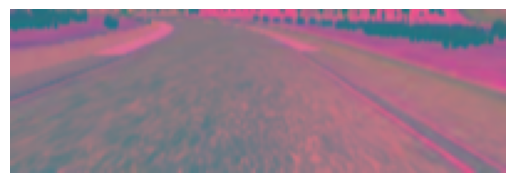

In [ ]:
batch_size = 16
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
print(len(test_dataloader))

for batch, (X, y_steering) in enumerate(test_dataloader):
    print(X.shape, y_steering.shape)
    print(y_steering)
    if batch == 0:
        # Choose the first image from the batch
        image = X[0]  # Assuming X has shape (batch_size, channels, height, width)

        # Convert the image tensor to numpy array and rearrange the channels for plotting (CHW to HWC)
        image = image.permute(1, 2, 0).cpu().numpy()

        
        # Plot the image
        plt.imshow(image)
        plt.axis('off')  # Turn off axis
        plt.show()

        break



In [ ]:
class Nvidia(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 24, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(24, 36, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(36, 48, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(48, 64, 3, stride = 1),
            nn.ELU(),
            nn.Conv2d(64, 64, 3, stride = 1),
            nn.Dropout(p =0.5)
        )
        self.linear_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=64*1*18, out_features=100),
            nn.ELU(),
            nn.Linear(in_features=100, out_features=50),
            nn.ELU(),
            nn.Linear(in_features=50, out_features=10),
            nn.Linear(in_features=10, out_features=1)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_layers(x)
        #print(x.shape)
        x = self.linear_layers(x)
       # print(x.shape)
        return x



In [ ]:
torch.manual_seed(42)
model_1 = Nvidia().to(device)
model_1

Nvidia(
  (conv_layers): Sequential(
    (0): Conv2d(3, 24, kernel_size=(5, 5), stride=(2, 2))
    (1): ELU(alpha=1.0)
    (2): Conv2d(24, 36, kernel_size=(5, 5), stride=(2, 2))
    (3): ELU(alpha=1.0)
    (4): Conv2d(36, 48, kernel_size=(5, 5), stride=(2, 2))
    (5): ELU(alpha=1.0)
    (6): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): ELU(alpha=1.0)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): Dropout(p=0.5, inplace=False)
  )
  (linear_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1152, out_features=100, bias=True)
    (2): ELU(alpha=1.0)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): ELU(alpha=1.0)
    (5): Linear(in_features=50, out_features=10, bias=True)
    (6): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [ ]:
MseLoss = nn.MSELoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr = 0.001)

In [ ]:

# Set the seed and start the timer
torch.manual_seed(42)

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 40
history_train_loss = []
history_test_loss = []

# Create training and testing loop
for epoch in range(epochs):

    print(f"Epoch: {epoch}\n-------")

    ### Training
    train_loss = 0
    
    # Add a loop to loop through training batches
    #for batch, (X, y) in enumerate(train_dataloader):

    for batch, (X, y_steering) in enumerate(train_dataloader):


        X, y_steering = X.to(device), y_steering.to(device)

        model_1.train()
        # 1. Forward pass
        y_logits = model_1(X)

        # 2. Calculate loss (per batch)
        #print(f" logit_shape : {torch.squeeze(y_logits).shape}, steering_shape : {y_steering.shape}")
        loss = MseLoss(torch.squeeze(y_logits), y_steering)

        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 20 == 0:
            print(f"Looked at {int(batch * batch_size)}/{len(X_train)} samples")

    model_name =  str(epoch) + "_" + "model_1.pth"
    torch.save(model_1.state_dict(), model_name)
    print(f"Saving model: {model_name}")



    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    history_train_loss.append(train_loss)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss = 0

    model_1.eval()
    with torch.inference_mode():
        for batch, (X, y_steering) in enumerate(test_dataloader):


            X, y_steering = X.to(device), y_steering.to(device)


            # 1. Forward pass
            test_logits = model_1(X)

            loss1 = MseLoss(torch.squeeze(test_logits), y_steering)

            loss = loss

            # 2. Calculate loss (accumatively)
            test_loss += loss # accumulatively add up the loss per epoch


        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)
        history_test_loss.append(test_loss)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 0
-------
Looked at 0/3662 samples
Looked at 320/3662 samples
Looked at 640/3662 samples
Looked at 960/3662 samples
Looked at 1280/3662 samples
Looked at 1600/3662 samples
Looked at 1920/3662 samples
Looked at 2240/3662 samples
Looked at 2560/3662 samples
Looked at 2880/3662 samples
Looked at 3200/3662 samples
Looked at 3520/3662 samples
Saving model: 0_model_1.pth

Train loss: 0.16291 | Test loss: 0.27993
Epoch: 1
-------
Looked at 0/3662 samples
Looked at 320/3662 samples
Looked at 640/3662 samples
Looked at 960/3662 samples
Looked at 1280/3662 samples
Looked at 1600/3662 samples
Looked at 1920/3662 samples
Looked at 2240/3662 samples
Looked at 2560/3662 samples
Looked at 2880/3662 samples
Looked at 3200/3662 samples
Looked at 3520/3662 samples
Saving model: 1_model_1.pth

Train loss: 0.16026 | Test loss: 0.30632
Epoch: 2
-------
Looked at 0/3662 samples
Looked at 320/3662 samples
Looked at 640/3662 samples
Looked at 960/3662 samples
Looked at 1280/3662 samples
Looked at 1600/

KeyboardInterrupt: 

In [ ]:
history_train_loss = [loss.detach().cpu().numpy() for loss in history_train_loss]
history_train_loss = np.array(history_train_loss)

history_test_loss = [loss.detach().cpu().numpy() for loss in history_test_loss]
history_test_loss = np.array(history_test_loss)

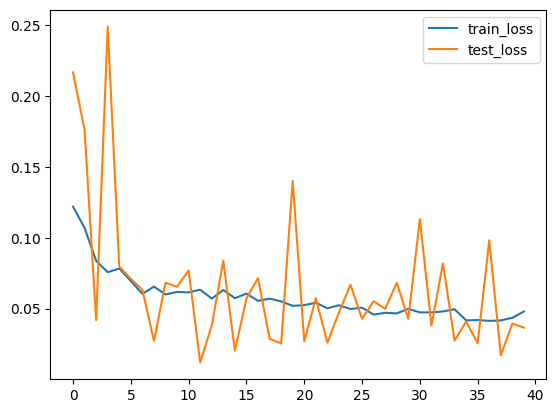

In [ ]:
# plot loss curves
plt.plot(history_train_loss, label = "train_loss")
plt.plot(history_test_loss, label = "test_loss")
plt.legend()
plt.show()